## NYC Airbnb Open Data - Information Extraction Workflow

In [29]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [30]:
data = pd.read_csv("AB_NYC_2019.csv", index_col = "id")
data.sort_index(ascending = True, inplace = True)
data["last_review"].fillna("Not Available", inplace = True)
data["reviews_per_month"].fillna("Not Available", inplace = True)
data.head(10)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,Not Available,Not Available,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.1,1,0
5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.4,1,0
5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0


Checking how many different values it has for "room_type"

In [3]:
data["room_type"].nunique()

3

Checking their names

In [4]:
data["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

## Type will be changed for neighbourhood_group and room_type to "category", in order to save some  memory

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 2539 to 36487245
Data columns (total 15 columns):
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       48895 non-null object
reviews_per_month                 48895 non-null object
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(2), int64(6), object(7)
memory us

In [6]:
data["room_type"] = data["room_type"].astype("category")

In [7]:
data["neighbourhood_group"] = data["neighbourhood_group"].astype("category")

In [8]:
data.dtypes

name                                object
host_id                              int64
host_name                           object
neighbourhood_group               category
neighbourhood                       object
latitude                           float64
longitude                          float64
room_type                         category
price                                int64
minimum_nights                       int64
number_of_reviews                    int64
last_review                         object
reviews_per_month                   object
calculated_host_listings_count       int64
availability_365                     int64
dtype: object

As shown below, there was some memory usage optimization

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 2539 to 36487245
Data columns (total 15 columns):
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null category
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null category
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       48895 non-null object
reviews_per_month                 48895 non-null object
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: category(2), float64(2), int64(6), ob

## What type of room has most/less listings count

In [10]:
data["calculated_host_listings_count"] = data["calculated_host_listings_count"].astype("int")

In [11]:
data[data["room_type"] == "Private room"]

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,Not Available,Not Available,1,365
5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.4,1,0
5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
5441,Central Manhattan/near Broadway,7989,Kate,Manhattan,Hell's Kitchen,40.76076,-73.98867,Private room,85,2,188,2019-06-23,1.5,1,39
5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,2019-06-24,1.34,3,314
6021,Wonderful Guest Bedroom in Manhattan for SINGLES,11528,Claudio,Manhattan,Upper West Side,40.79826,-73.96113,Private room,85,2,113,2019-07-05,0.91,1,333
7322,Chelsea Perfect,18946,Doti,Manhattan,Chelsea,40.74192,-73.99501,Private room,140,1,260,2019-07-01,2.12,1,12


In [12]:
data["room_type"].unique()

[Private room, Entire home/apt, Shared room]
Categories (3, object): [Private room, Entire home/apt, Shared room]

In [13]:
data[data["room_type"] == "Private room"]["calculated_host_listings_count"].sum()

72062

In [14]:
data[data["room_type"] == "Entire home/apt"]["calculated_host_listings_count"].sum()

271834

In [15]:
data[data["room_type"] == "Shared room"]["calculated_host_listings_count"].sum()

5409

As shown above, the Entire home/apt room type had more guests

Properties that had more/less guests

In [16]:
data["calculated_host_listings_count"].nlargest(5)

id
30181691    327
30181945    327
30347708    327
30937590    327
30937591    327
Name: calculated_host_listings_count, dtype: int64

For the sake of this example, the first one was choosen. Since, there more than 40 properties that had a total listing count

In [17]:
data.loc[30181691]

name                              Sonder | 180 Water | Incredible 2BR + Rooftop
host_id                                                               219517861
host_name                                                          Sonder (NYC)
neighbourhood_group                                                   Manhattan
neighbourhood                                                Financial District
latitude                                                                40.7064
longitude                                                              -74.0065
room_type                                                       Entire home/apt
price                                                                       302
minimum_nights                                                               29
number_of_reviews                                                             0
last_review                                                       Not Available
reviews_per_month                       

In [18]:
data["calculated_host_listings_count"].nsmallest(5)

id
3647    1
3831    1
5022    1
5099    1
5121    1
Name: calculated_host_listings_count, dtype: int64

The first one was choosen as the one with less guests

In [19]:
data.loc[3647]

name                              THE VILLAGE OF HARLEM....NEW YORK !
host_id                                                          4632
host_name                                                   Elisabeth
neighbourhood_group                                         Manhattan
neighbourhood                                                  Harlem
latitude                                                       40.809
longitude                                                    -73.9419
room_type                                                Private room
price                                                             150
minimum_nights                                                      3
number_of_reviews                                                   0
last_review                                             Not Available
reviews_per_month                                       Not Available
calculated_host_listings_count                                      1
availability_365    

## Checking the minimun_nights correlation with number of guests

In [20]:
data_2 = data[["minimum_nights", "calculated_host_listings_count"]].sort_values(by = "calculated_host_listings_count" )

In [21]:
data_2.tail(10)

,minimum_nights,calculated_host_listings_count
id,,
32240537,2,327
32240590,2,327
32240603,2,327
32240788,2,327
32240812,2,327
32240873,2,327
32240896,2,327
32240933,2,327
32240970,2,327


In [22]:
data_2.head(10)

,minimum_nights,calculated_host_listings_count
id,,
19677284,4,1
21881810,3,1
21882745,4,1
21883309,3,1
21884025,3,1
21884557,3,1
21884758,3,1
21881709,3,1
21885522,5,1


Result: Guest have the tendency of looking into places with a minimun 2 night stay policy

I will also add the word "day" after every number on "calculated_host_listings_count". I will use a For Loop.

In [25]:
def add_day(day):
    return str(day) + " day(s)"
data["calculated_host_listings_count"] = data["calculated_host_listings_count"].apply(add_day)

In [26]:
data.head(3)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6 day(s),365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2 day(s),355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,Not Available,Not Available,1 day(s),365


## Pie Chart to see the neighbourhood_group diversity

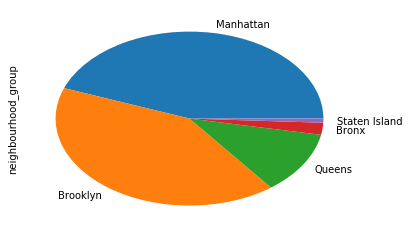

In [44]:
data["neighbourhood_group"].value_counts().plot(kind = "pie")
plt.show()